# Part II - (Ford Go Bike)
## by (Dauda olawale Kolawole)

## Investigation Overview

> in this investigation, I've looked at the  user type of the  Ford GoBike  system. The main focus was on biking duration, the time (weekday, hour) .


## Dataset Overview

> This data set information was produced from Ford GoBike System the information in it talked about individual rides that were made in a bike-sharing system for covering San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_date'] =pd.to_datetime(df.start_time.dt.strftime('%Y-%m-%d'))
df['start_hourofday'] = (df.start_time.dt.strftime('%H')).astype(int)
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')
df['end_date'] = pd.to_datetime(df.end_time.dt.strftime('%Y-%m-%d'))
df['end_hourofday'] = (df.end_time.dt.strftime('%H')).astype(int)
df['end_dayofweek'] = df.end_time.dt.strftime('%A')
df['end_month'] = df.end_time.dt.strftime('%B')
df['duration_minute'] = (df['duration_sec']/60).astype(int)
df['member_age'] = 2019 - df['member_birth_year']
df.drop(['duration_sec','start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
         'end_station_id','end_station_latitude', 'end_station_longitude','member_birth_year'],axis =1 , inplace = True)
df.dropna( inplace = True)
df['member_age'] = df['member_age'].astype(int)
df['bike_id'] = df['bike_id'].astype('str')
df.head()

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,end_date,end_hourofday,end_dayofweek,end_month,duration_minute,member_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,2019-02-28,17,Thursday,February,2019-03-01,8,Friday,March,869,35
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2019-02-28,12,Thursday,February,2019-03-01,5,Friday,March,1030,47
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,2019-02-28,17,Thursday,February,2019-03-01,4,Friday,March,608,30
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,26,45
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,29,60


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> by visualize distripution of Hours it seems that The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

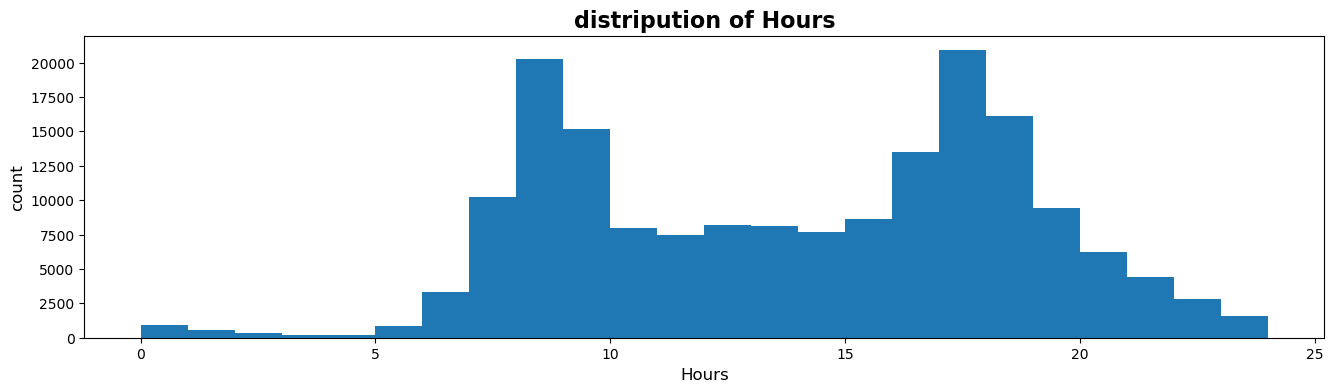

In [5]:
bins = np.arange(0,25, 1)
plt.figure(figsize=(16,4) , dpi =100)
plt.hist(data = df, x = 'start_hourofday', bins = bins)
plt.xlabel('Hours',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('distripution of Hours', fontsize=16, fontweight='bold');

## (Visualization 2)

> Tuesdays and Wednesdays are the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.

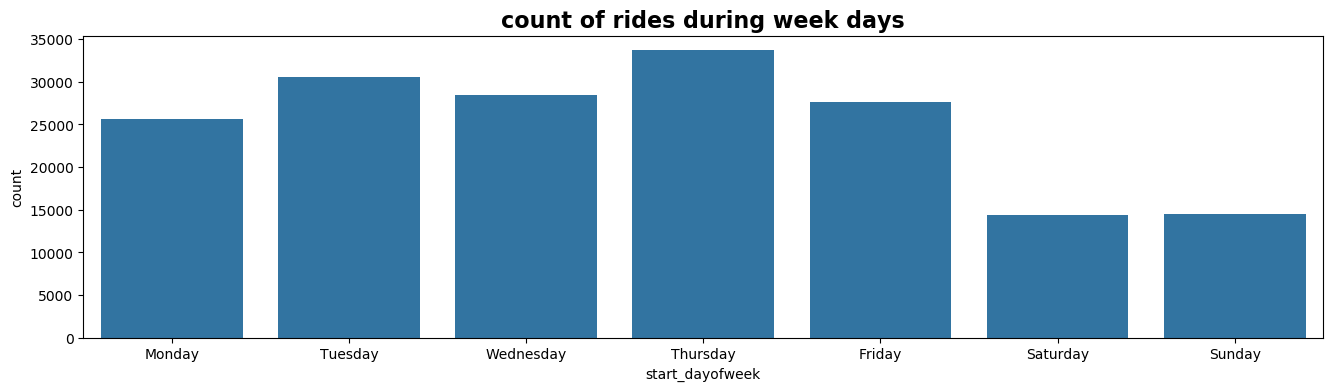

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(16,4), dpi =100)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='start_dayofweek', color=base_color, order =days)
plt.title("count of rides during week days" , fontsize=16, fontweight='bold');

## (Visualization 3)

>  Customer alomost donot use bike during night , however Subscriber The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

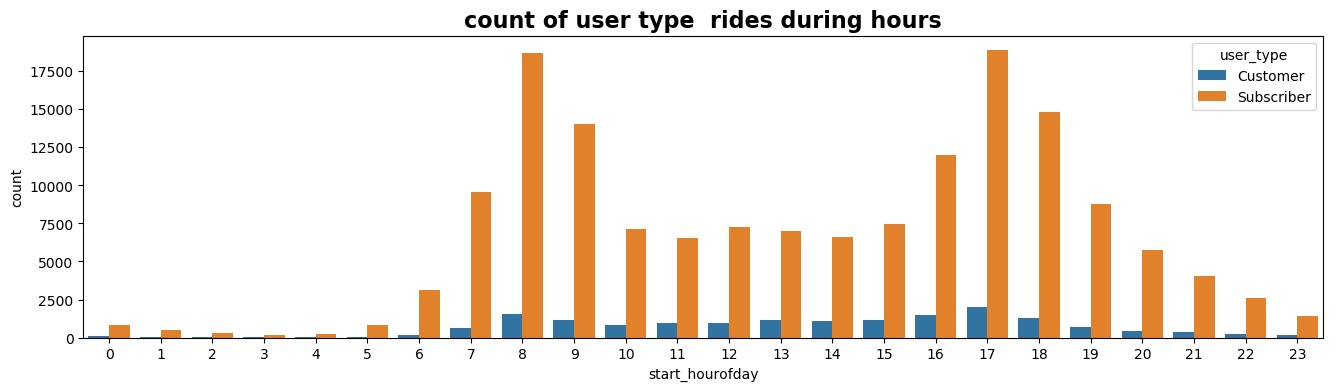

In [8]:
plt.figure(figsize=(16,4), dpi =100)

sb.countplot(data=df, x='start_hourofday', hue = 'user_type')
plt.title("count of user type  rides during hours" , fontsize=16, fontweight='bold');

## (Visualization 4)

> Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

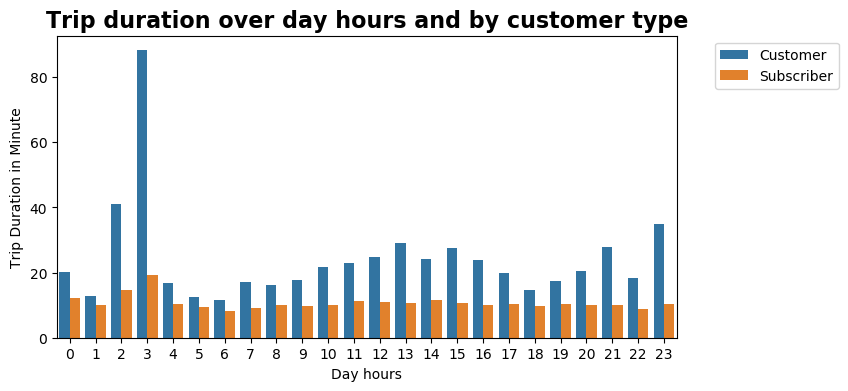

In [9]:
plt.figure(figsize = (8,4), dpi = 100)
sb.barplot(data = df, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)
plt.title("Trip duration over day hours and by customer type",fontsize=16, fontweight='bold')
plt.xlabel('Day hours')
plt.ylabel('Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 366217 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 